In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
df = pd.read_csv("ITSM_data.csv", low_memory=False)

In [36]:
df['Priority_Label'] = df['Priority'].apply(lambda x: 1 if x in [1, 2] else 0)

In [37]:
drop_cols = ['Priority','Incident_ID','Close_Time','Impact','Urgency','Open_Time','Reopen_Time']
df = df.drop(columns=drop_cols,errors='ignore')

In [38]:
df = df.fillna("Unknown")

In [39]:
label_encoders = {}
for col in df.select_dtypes(include=['object','category']).columns:
    df[col] = df[col].astype(str)
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [40]:
X = df.drop('Priority_Label', axis=1)
y = df['Priority_Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle=True, random_state= 42)
clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13732    40]
 [  130    80]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13772
           1       0.67      0.38      0.48       210

    accuracy                           0.99     13982
   macro avg       0.83      0.69      0.74     13982
weighted avg       0.99      0.99      0.99     13982



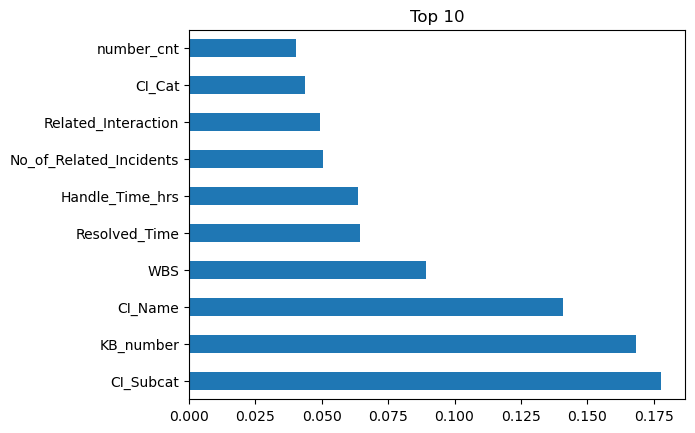

In [41]:
import matplotlib.pyplot as plt
feat_importances = pd.Series(clf.feature_importances_,index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10")
plt.show()